In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


1. Convert the height and weight columns to numerical forms
2. Remove the unnecessary newline characters from all columns that have them.
3. Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
4. 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.
5. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
6. Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('_mpl-gallery')
pd.set_option("display.max_columns", 300)

In [3]:
df = pd.read_csv('/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv')
df.head()

/tmp/ipykernel_18/3257142423.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv')


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
df.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,58.768007,42.697244,256.481848,55.587913,47.248116,42.392012,52.725012,58.528795,317.721007,64.357922,64.413088,63.367617,61.655619,63.926761,296.606618,57.802413,64.577006,62.654724,64.786132,46.786343,254.200379,55.590969,46.394067,50.299858,53.857158,48.058328,58.073608,139.908689,46.558828,47.705359,45.644502,81.436693,16.416197,16.207124,16.076558,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,14.518995,17.647116,78.652897,18.761660,18.208857,17.228069,15.177695,16.566286,55.881422,14.890208,14.638874,14.597144,9.072114,14.062703,50.733368,13.308980,11.844592,15.804986,12.488690,19.300862,64.596228,17.140038,20.697516,19.429171,13.708607,15.655890,12.079042,61.218624,20.138813,21.367322,20.922167,84.665579,17.554221,16.816305,16.491064,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.000000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,6

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [6]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

**Convert the height and weight columns to numerical forms**

In [7]:
df['Height'].unique()

array(['5\'7"', '6\'2"', '5\'11"', '5\'9"', '6\'0"', '5\'10"', '6\'3"',
       '6\'4"', '6\'1"', '6\'6"', '5\'8"', '5\'6"', '6\'5"', '5\'5"',
       '5\'4"', '6\'7"', '5\'2"', '5\'3"', '6\'8"', '5\'1"', '6\'9"'],
      dtype=object)

In [8]:
# remove unnecessary characters
split_height = df['Height'].str.extract(r"(\d+)\'(\d+)\"")

df['Height_L'] = pd.to_numeric(split_height[0])
df['Height_I'] = pd.to_numeric(split_height[1])

df[['Height_L', 'Height_I']]


,Height_L,Height_I
0,5,7
1,6,2
2,6,2
3,5,11
4,5,9
...,...,...
18974,5,10
18975,5,7
18976,5,10
18977,5,9


In [9]:
# converting height units to cm
df['Height']= (df['Height_L'] * 12 + df['Height_I']) * 2.54

df['Height']

0        170.18
1        187.96
2        187.96
3        180.34
4        175.26
          ...  
18974    177.80
18975    170.18
18976    177.80
18977    175.26
18978    175.26
Name: Height, Length: 18979, dtype: float64

In [10]:
df = df.rename(columns={'Height':'Height_cm'})
df = df.drop(['Height_L','Height_I'], axis=1)

In [11]:
# converting lbs to kg
df['Weight_kg'] = df['Weight'].str.replace('lbs', '')
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'])
df['Weight'] = df['Weight_kg'] * 0.453592

In [12]:
df = df.rename(columns={'Weight':'Weight_Kg'})
df['Weight_Kg']=df['Weight_Kg'].round()
df = df.drop('Weight_kg', axis=1)

**Remove the unnecessary newline characters from all columns that have them.**

In [13]:
df['Team & Contract'].unique()

array(['\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n',
       '\n\n\n\nJuventus\n2018 ~ 2022\n\n',
       '\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n', ...,
       '\n\n\n\nDalian YiFang FC\n2019 ~ 2024\n\n',
       '\n\n\n\nHenan Jianye FC\n2020 ~ 2021\n\n',
       '\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n'], dtype=object)

In [14]:
df['Team & Contract'] = df['Team & Contract'].str.replace('\n', '')
df['Hits'] = df['Hits'].str.replace('\n', '')

In [15]:
df[['Team','Contract']] = df['Team & Contract'].str.split(r'(\d{4} ~ \d{4})', expand=True).iloc[:, :-1]


In [16]:
df.insert(9,'Team', df.pop('Team'))
df.insert(10,'Contract', df.pop('Contract'))

In [17]:
df['Contract'] = df['Contract'].str.replace('~', '-')

In [18]:
df = df.drop('Team & Contract', axis=1)

**Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!**

In [19]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [20]:
df['Joined_Year'] = df['Joined'].dt.year


In [21]:
df['duration_member']=2023-df['Joined_Year']


In [22]:
df[df['duration_member']>10].LongName.unique()

array(['Lionel Messi', 'Manuel Neuer', 'Karim Benzema',
       'Sergio Ramos García', 'Sergio Agüero', 'Harry Kane',
       'Samir Handanovič', 'Sergio Busquets Burgos', 'Luka Modrić',
       'Hugo Lloris', 'Giorgio Chiellini', 'Jamie Vardy',
       'Raphaël Varane', 'Marco Verratti', 'David De Gea Quintana',
       'Thomas Müller', 'Jordi Alba Ramos', 'Jordan Henderson',
       'Gerard Piqué Bernabeu', 'Lorenzo Insigne', 'Jorge Resurrección',
       'Marco Reus', 'David Alaba', 'César Azpilicueta Tanco',
       'Kasper Schmeichel', 'Thomas Strakosha', 'José Luís Gayà Peña',
       'Edin Višća', 'Anthony Lopes', 'Iker Muniain Goñi',
       'Marcelo Vieira da Silva', 'Karim Bellarabi',
       'Mário Figueira Fernandes', 'Alphonse Areola', 'Jérôme Boateng',
       'Fernando Muslera', 'Lars Bender', 'Iñaki Williams Arthuer',
       'Alessandro Florenzi', 'Javier Martínez Aginaga',
       'Stéphane Ruffier', 'Segundo Mandíquez', 'Domenico Berardi',
       'Jack Grealish', 'José Ignacio Fer

**4. 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.**

In [23]:
df[['Wage', 'Value', 'Release Clause']] = df[['Wage', 'Value', 'Release Clause']].replace({'€': '', 'M': 'e6', 'K': 'e3', ',': ''}, regex=True)

In [24]:
df[['Wage', 'Value', 'Release Clause']] = df[['Wage', 'Value', 'Release Clause']].astype(float)


**5. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical**

In [25]:
df['W/F'].unique()
df['SM'].unique()
df['IR'].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [26]:
df['W/F']=df['W/F'].str.replace('★', '').astype(int)
df['SM']=df['SM'].str.replace('★', '').astype(int)
df['IR']=df['IR'].str.replace('★', '').astype(int)

**6. Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)**

In [27]:
df[['Wage', 'Value']].corr()

,Wage,Value
Wage,1.000000,0.848038
Value,0.848038,1.000000


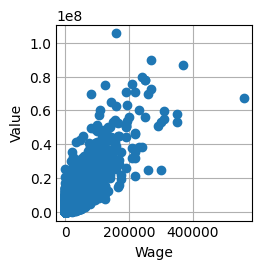

In [28]:
plt.scatter(df['Wage'], df['Value'])
plt.xlabel('Wage')
plt.ylabel('Value')

plt.show()

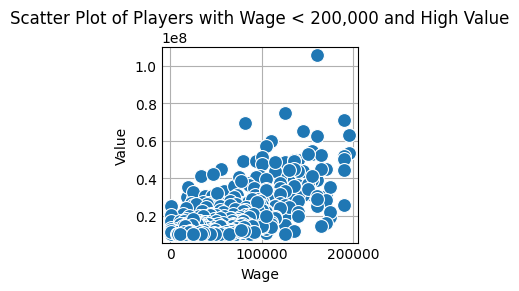

In [29]:
filtered_players = df[(df['Wage'] < 200000) & (df['Value'] > 10000000)]

sns.scatterplot(x='Wage', y='Value', data=filtered_players, s=100)
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Scatter Plot of Players with Wage < 200,000 and High Value')
plt.show()

In [30]:
filtered_df = df.loc[df['Wage'] < 200000, 'LongName']
filtered_df

2                    Jan Oblak
6                Kylian Mbappé
7        Alisson Ramses Becker
14                Manuel Neuer
18                N'Golo Kanté
                 ...          
18974           Mengxuan Zhang
18975            Vani Da Silva
18976                   Ao Xia
18977                Ben Hough
18978             Mateo Flores
Name: LongName, Length: 18949, dtype: object

In [31]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team,Contract,ID,Height_cm,Weight_Kg,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Year,duration_member
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona,2004 - 2021,158023,170.18,72.0,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,2004,19
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus,2018 - 2022,20801,187.96,83.0,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,2018,5
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid,2014 - 2023,200389,187.96,87.0,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,2014,9
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City,2015 - 2023,192985,180.34,70.0,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,2015,8
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain,2017 - 2022,190871,175.26,68.0,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,2017,6
